In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect
from sqlalchemy import MetaData
!pwd

/Users/edgar_macbook/Desktop/Data Analytics - BootCamp/Homework/HW8/Instructions


In [5]:
#engine = create_engine("sqlite:///Resources/hawaii.sqlite?check_same_thread=False")
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#for class_instance in session.query(Measurement).all():
 #   print(vars(class_instance))
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date



#Find out the current day in the table 
#current_Date = dt.datetime.today().year, dt.datetime.today().month, dt.datetime.today().day
#current_Date
#dt.date.today()



In [12]:
# One year ago from today 
one_year_ago = dt.date.today() - dt.timedelta(days=365)
print(one_year_ago)

2017-11-12


In [13]:
# I had to find out the last know date in the table, since I wasn't able to query anything by using a year from current day. 
#So I am going to do 2 yrs
last_known_date = session.query(Measurement.date).order_by(Measurement.id.desc()).limit(1).all()
last_known_date


[('2017-08-23')]

In [14]:
# One year from today is not far enough. 365 * 2
two_years_ago = dt.date.today() - dt.timedelta(days=730)
print(two_years_ago )

2016-11-12


In [15]:
precip = session.query(Measurement.id,Measurement.station,Measurement.prcp,
                       Measurement.date,Measurement.tobs).filter(Measurement.date >two_years_ago).all()


In [16]:
data_prcp = pd.DataFrame(precip)
data_p = data_prcp.set_index("date")

In [17]:
data_p.head(4)

,id,station,prcp,tobs
date,,,,
2016-11-13,2446,USC00519397,0.0,72.0
2016-11-14,2447,USC00519397,0.0,77.0
2016-11-15,2448,USC00519397,0.0,77.0
2016-11-16,2449,USC00519397,0.0,77.0


In [18]:
sorted_data_prcp = data_p.sort_index()

In [19]:
sorted_data_prcp.head(3)

,id,station,prcp,tobs
date,,,,
2016-11-13,2446,USC00519397,0.0,72.0
2016-11-13,19283,USC00516128,0.0,72.0
2016-11-13,5173,USC00513117,0.0,72.0


<IPython.core.display.Javascript object>


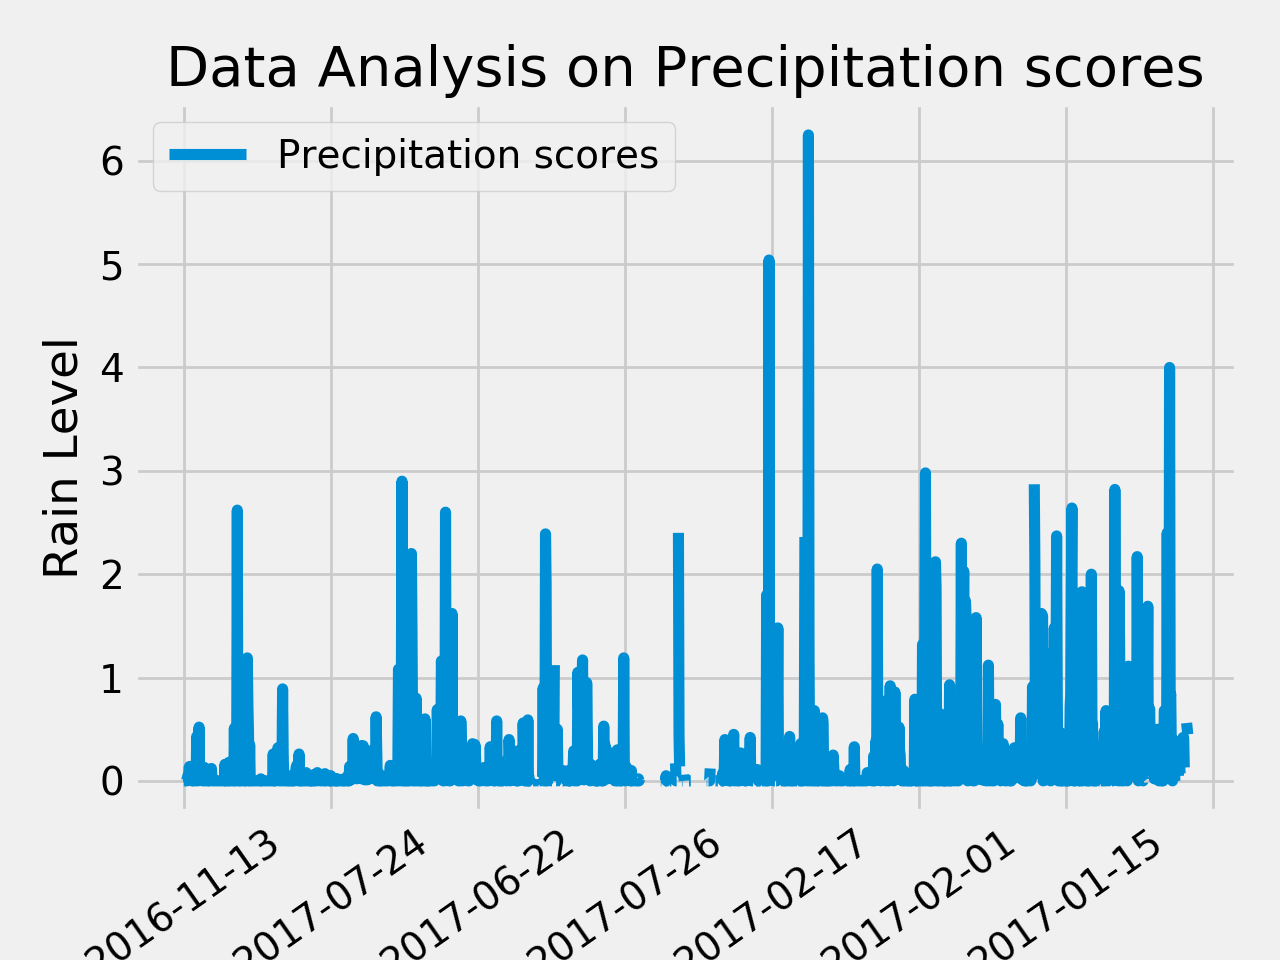

/anaconda3/lib/python3.5/site-packages/pandas/core/indexes/base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


<function matplotlib.pyplot.show(*args, **kw)>

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates

data_prcp.plot('date', 'prcp')
plt.xlabel('date')
plt.ylabel('Rain Level')
plt.legend(['Precipitation scores'])
plt.title('Data Analysis on Precipitation scores')
plt.tight_layout()
plt.xticks(rotation=35)
plt.show

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_prcp.prcp.describe()

count    1543.000000
mean        0.170920
std         0.441357
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         6.250000
Name: prcp, dtype: float64

In [22]:
# How many stations are available in this dataset?
stations_total = session.query(Measurement).group_by(Measurement.station).count()

print("Total number of stations:" ,stations_total)

Total number of stations: 9


In [40]:
# What are the most active stations?
# List the stations and the counts in descending order.

most_active = session.query(Measurement.station, 
                            func.count(Measurement.tobs)).group_by(
    Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

for s in most_active: print (s)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [24]:
# Table of MIN , MAX, AVG on all stations 

temps = session.query(Measurement.station,func.min(Measurement.tobs), 
                      func.max(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).all()
temps_dat = pd.DataFrame(temps, columns=['STATION', 'MIN', 'MAX', 'AVERAGE'])
temps_dat = temps_dat.set_index('STATION')
temps_dat

,MIN,MAX,AVERAGE
STATION,,,
USC00511918,53.0,87.0,71.615968
USC00513117,59.0,85.0,72.689184
USC00514830,58.0,85.0,74.873297
USC00516128,58.0,84.0,70.915008
USC00517948,58.0,87.0,74.684402
USC00518838,58.0,83.0,72.724070
USC00519281,54.0,85.0,71.663781
USC00519397,56.0,87.0,74.553231
USC00519523,56.0,85.0,74.543649


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

most_act_station = session.query(Measurement.station,func.min(Measurement.tobs), 
                                    func.max(Measurement.tobs),
                                 func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(most_act_station)


[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [39]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


temp_of_highest = session.query(Measurement.station,Measurement.date,
                                Measurement.tobs).filter(
    Measurement.station == 'USC00519281').filter(
    Measurement.date >=two_years_ago).all()
highestOBS = pd.DataFrame(temp_of_highest)

<IPython.core.display.Javascript object>


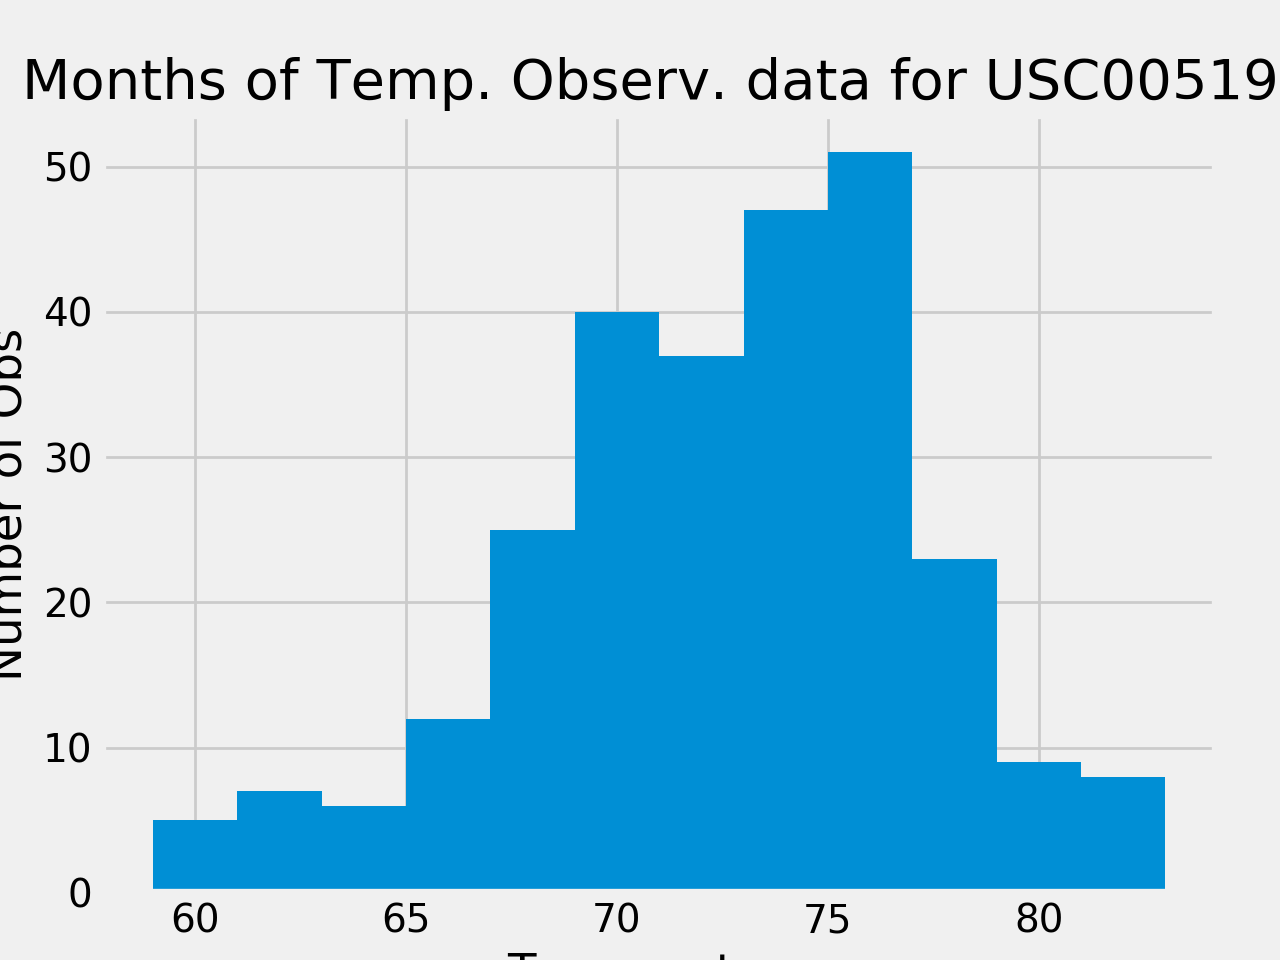

Text(0.5, 1.0, '12 Months of Temp. Observ. data for USC00519281')

In [27]:
highestOBS.hist(bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Number of Obs')
plt.title('12 Months of Temp. Observ. data for USC00519281')


In [28]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = dt.date(2018,10,25)
end_date = dt.date(2018,11,10)
prev_trip_calc = (calc_temps((start_date- dt.timedelta(days=730)), (end_date- dt.timedelta(days=730))))
print(prev_trip_calc)
type(prev_trip_calc)

[(63.0, 74.87155963302752, 81.0)]


list

<IPython.core.display.Javascript object>


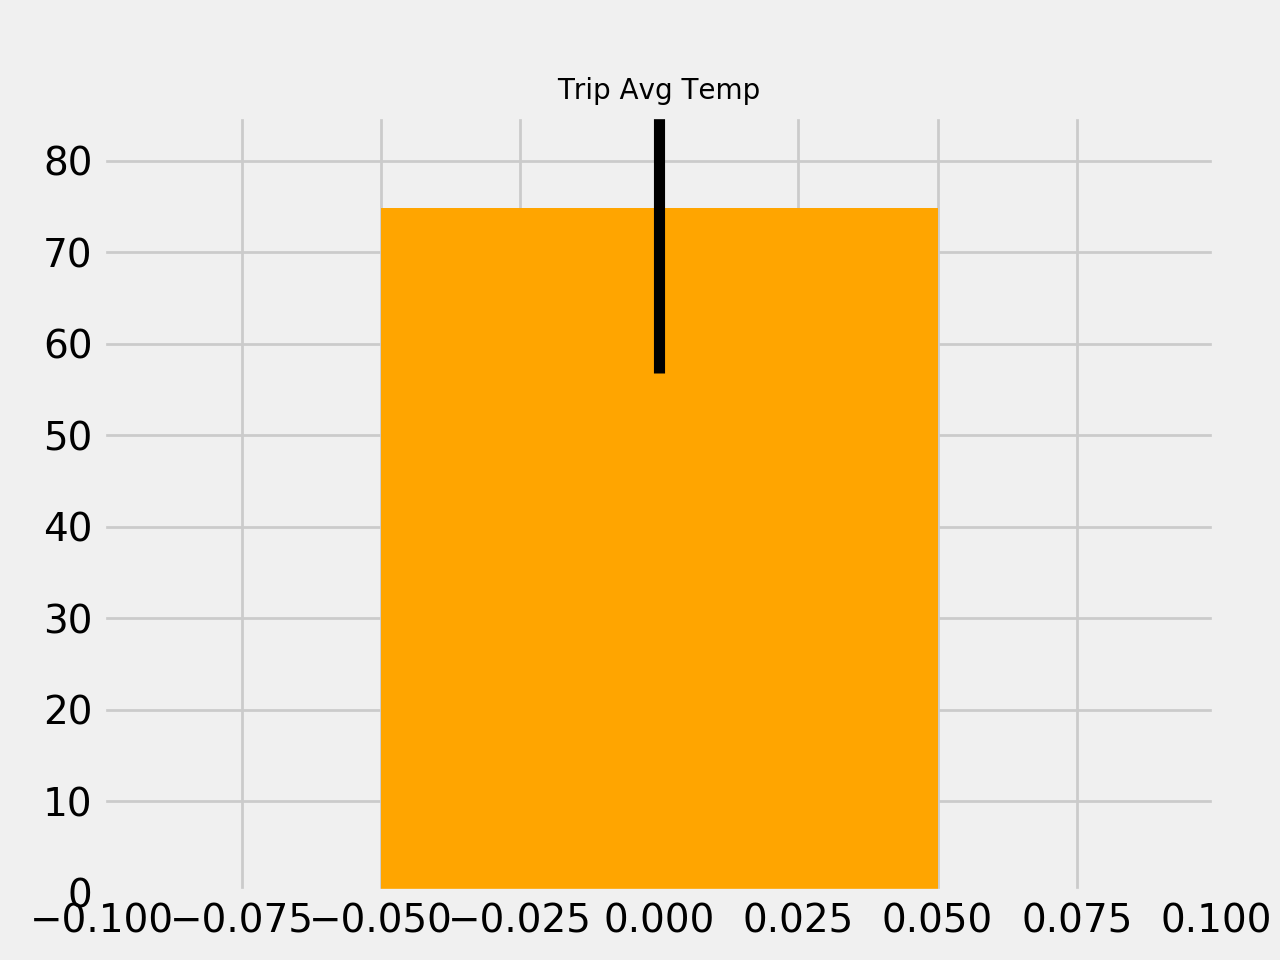

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
y = [prev_trip_calc[0][1]]
yerr = prev_trip_calc[0][2] - prev_trip_calc[0][0]
x =0

ax.set_title("Trip Avg Temp", fontsize=10)
ax.bar(x,y, width=.1, color="Orange", yerr=yerr)
ax.set_ylim(0, 85)
ax.set_xbound(lower=-.1, upper=.1)
plt.show()

In [38]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_prev_start = start_date- dt.timedelta(days=730)
trip_prev_end = end_date- dt.timedelta(days=730)

rainF_per_station = session.query(Measurement.station,
                                  func.sum(Measurement.prcp)).filter(
    Measurement.date >= trip_prev_start).filter(
    Measurement.date <= trip_prev_end).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
rainF_per_station



[('USC00516128', 5.839999999999999),
 ('USC00519281', 1.1800000000000002),
 ('USC00514830', 0.9900000000000001),
 ('USC00513117', 0.65),
 ('USC00517948', 0.6000000000000001),
 ('USC00519523', 0.6),
 ('USC00519397', 0.37000000000000005)]

datetime.date(2016, 10, 25)

## Optional Challenge Assignment

In [41]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
